### 1. Install dependencies using Pip or Conda, or under Visual Studio Code (best choice), use PIP MANAGER extension

#### 1.1. Frequently used libraries

##### See https://colab.research.google.com/github/google/earthengine-community/blob/master/tutorials/intro-to-python-api/index.ipynb#scrollTo=u6V2UYFlPAPj

In [2]:
%reset -f
## ee : library to access Google Earth Engine
## geemap : library to access Google Earth Engine
## geopandas : library to access geospatial data
## earthpy : library to access geospatial data
## folium : library to access geospatial data
## matplotlib : library to access geospatial data
## numpy : library to access geospatial data
## pandas : library to access geospatial data
## rasterio : library to access geospatial data
## shapely : library to access geospatial data  
## sklearn : library to access geospatial data
## tqdm : library to access geospatial data 
## pyproj : library to access geospatial data
## os : library to access geospatial data   
## sys : library to access geospatial data
## subprocess : library to access geospatial data   
## datetime : library to access geospatial data
## time : library to access geospatial data
## glob : library to access geospatial data


#### 1.2. Datasets : https://developers.google.com/earth-engine/datasets/

#### 1.3. Open GEE session (gmail adress is needed) 

In [1]:
import ee

# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()


Successfully saved authorization token.


#### 1.4. Visualization of the data using folium and geemap (geemap is a very useful library to visualize and process data from Google Earth Engine)

In [2]:
import folium

# Define the center of our map.
lat, lon = 48.77, 2.855
my_map = folium.Map(location=[lon,lat], zoom_start=10)
my_map

In [3]:
import geemap

# Create a Map
Map = geemap.Map()
lat, lon = 48.48, 2.78
Point=ee.Geometry.Point([lon,lat])
Map.addLayer(Point, {}, 'Point location')

# Display the map
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

### 2.3. What is necessary to know : Features, Images and Collections
Datasets can be of different types: 
- Features which are geometric objects with a list of properties. For example, a polygon with some properties such as name and area, is an ee.Feature.
- Images which are like features, but may include several bands. For example, the ground elevation given by the USGS here is an ee.Image.
- Collections which are groups of features or images. For example, the Global Administrative Unit Layers giving administrative boundaries is a ee.FeatureCollection and the MODIS Land Surface Temperature dataset is an ee.ImageCollection.


#### 2.3.1. Create feature and feature collection and properties

##### Create feature : point, line and polygone

In [ ]:

# Create a Feature : point, rectangle, polygon
latitude, longitude = 48.48, 2.78
feature_pt = ee.Feature(ee.Geometry.Point(longitude,latitude), {'name': 'Point'})
feature_rectangle=ee.Feature(ee.Geometry.Rectangle([2.78, 48.48, 3.0, 48.15]), {'name': 'Rectange'})
feature_polygon=ee.Feature(ee.Geometry.Polygon([[2.78, 48.48], [3.0, 48.15], [3.2, 48.45], [3.0, 48.70]]), {'name': 'Polygon'})

# create circle
# Define a point (center).
point = ee.Geometry.Point(2.78, 48.48)

# Define a circle by buffering the point.
circle = point.buffer(1000)  # The radius is in meters.
# Create a feature from the circle.
feature_circle = ee.Feature(circle, {'name': 'Circle'})

# Print it.
print(feature_circle.getInfo())
Map.addLayer(feature_pt, {}, 'Point location')
Map.addLayer(feature_rectangle, {}, 'Rectangle')
Map.addLayer(feature_polygon, {}, 'Polygon')
Map.addLayer(feature_circle, {}, 'Circle')
Map

{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[2.7800000000000007, 48.48899886595148], [2.776207569451764, 48.488640648801265], [2.7727171665972192, 48.487594525920876], [2.769806730818639, 48.48594380762316], [2.767707956962133, 48.48381994230586], [2.7665878449052257, 48.481392037167936], [2.7665354259077186, 48.47885338244601], [2.7675547162095593, 48.47640605647058], [2.7695644461188036, 48.474244839797606], [2.7724045709307372, 48.47254171898007], [2.775849032363762, 48.47143221088446], [2.7796237478954526, 48.471004591628734], [2.7834283975901464, 48.4712928825047], [2.786960283588095, 48.47227414724703], [2.7899383773705706, 48.47387031411518], [2.7921256554371165, 48.475954378886016], [2.7933479561376013, 48.478360498588145], [2.7935078598597847, 48.48089717744301], [2.7925924824495425, 48.48336250014129], [2.7906745494107814, 48.48556020294294], [2.7879066502084435, 48.48731530377108], [2.78450911652048, 48.48848804480746], [2.7807524817029297, 48.488985

Map(bottom=812.0, center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=Search…

##### Create feature collection: point, line and polygone

In [ ]:

# Make a list of Features.
features = [
  ee.Feature(ee.Geometry.Rectangle([30.01, 59.80, 30.59, 60.15]), {'name': 'Rectange'}),
  ee.Feature(ee.Geometry.Point([-73.96, 40.781]), {'name': 'Point'}),
  ee.Feature(ee.Geometry.Point([6.4806, 50.8012]), {'name': 'Point'})
]
# Create a FeatureCollection from the list.
from_list = ee.FeatureCollection(features)
# Print it.
print(from_list.getInfo())

#### 2.3.2. Image and image Collection

##### 2.3.2.1. Read Image and image Collection

In [8]:
# Import the USGS ground elevation image : contains a single band representing elevation.
elevation = ee.Image('USGS/SRTMGL1_003')
# Import the MODIS land cover collection : 
LandcoverMODIS = ee.ImageCollection('MODIS/006/MCD12Q1')
# Import the MODIS NDVI collection.
ndvi = ee.ImageCollection('MODIS/006/MOD13A1')
# Import the MODIS land surface temperature collection.
LSTemp = ee.ImageCollection('MODIS/006/MOD11A1')


##### Visualise an image

In [11]:
#  Visualize the elevation data with geemap using the addLayer() function.
Map = geemap.Map()
# Create a palette to display the elevation data
# Define the visualization parameters.
vis_params = {
  'min': 0,
  'max': 4000,
  'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

# Center the map and display the image
Map.setCenter(lon=2.78, lat=48.5, zoom=12)
Map.addLayer(elevation, vis_params, 'Elevation in m')
Map

Map(center=[48.5, 2.78], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(…

##### Get information about the image collection

In Google Earth Engine (GEE), an `ImageCollection` object has several methods that you can use to manipulate and analyze the collection. Here are some of the most commonly used methods:

- `filter()`: Filters the collection based on metadata or image properties.
- `map()`: Applies a function to each image in the collection.
- `reduce()`: Reduces the collection to an image by combining all images using a specified reducer.
- `sort()`: Sorts the collection by a property.
- `first()`: Gets the first image in the collection.
- `size()`: Gets the number of images in the collection.
- `getInfo()`: Retrieves information about the collection.
- `mosaic()`: Creates a mosaic of the images in the collection.
- `median()`: Gets the median of each pixel for all images in the collection.
- `mean()`: Gets the mean of each pixel for all images in the collection.
- `min()`: Gets the minimum of each pixel for all images in the collection.
- `max()`: Gets the maximum of each pixel for all images in the collection.
- `count()`: Counts the number of non-null pixels for each image in the collection.
- `sum()`: Sums all the pixel values for each image in the collection.

You can find more information about these methods and others in the [GEE API documentation](https://developers.google.com/earth-engine/apidocs/ee-imagecollection).

In Google Earth Engine (GEE), an `Image` object has several methods that you can use to manipulate and analyze the image. Here are some of the most commonly used methods:

- `addBands()`: Adds new bands to the image.
- `clip()`: Clips the image to a specified geometry.
- `rename()`: Renames the bands of the image.
- `select()`: Selects specified bands from the image.
- `projection()`: Gets the image's projection.
- `reduceRegion()`: Reduces the image to a statistic for a specified region.
- `reduceNeighborhood()`: Reduces the image to a statistic for a specified neighborhood.
- `normalizedDifference()`: Computes the normalized difference of two bands.
- `bandNames()`: Gets the names of the bands in the image.
- `propertyNames()`: Gets the names of the properties in the image.
- `get()`: Gets a property from the image.
- `set()`: Sets a property in the image.
- `mask()`: Masks the image according to a condition.
- `updateMask()`: Updates the mask of the image.
- `toFloat()`, `toInt()`, `toDouble()`: Changes the data type of the image.
- `resample()`: Resamples the image using a specified resampler.
- `reproject()`: Reprojects the image to a specified projection.

You can find more information about these methods and others in the [GEE API documentation](https://developers.google.com/earth-engine/apidocs/ee-image).

In [22]:
# Define your image collection.
collection = ndvi

# Get the date of the first image in the collection.
first_image = ee.Image(collection.first())
first_date = ee.Date(first_image.get('system:time_start')).format('YYYY-MM-dd')
print('First image date: ', first_date.getInfo())

# Get the date of the last image in the collection.
last_image = ee.Image(collection.sort('system:time_start', False).first())
last_date = ee.Date(last_image.get('system:time_start')).format('YYYY-MM-dd')
print('Last image date: ', last_date.getInfo())

# Get the number of images in the collection.
num_images = collection.size()
print('Number of images: ', num_images.getInfo())

# filter the collection by date
# Define your start and end dates.
start_date = '2020-01-01'
end_date = '2020-12-31'

# Filter the collection.
filtered_collection = collection.filterDate(start_date, end_date)

# Calculate the mean of the collection.
mean_image = collection.reduce(ee.Reducer.mean())
print('Mean of collection: ', mean_image.getInfo())
# Calculate the median of the collection.
median_image = collection.reduce(ee.Reducer.median())
print('Median of collection: ', median_image.getInfo())
# the mean and the median are calculated for each pixel in the image collection by band
numb_bands_in_median_image = median_image.bandNames().size().getInfo()   
print(numb_bands_in_median_image)
print('Names of bands in median image', median_image.bandNames().getInfo())


First image date:  2000-02-18
Last image date:  2023-02-02
Number of images:  529
Mean of collection:  {'type': 'Image', 'bands': [{'id': 'NDVI_mean', 'data_type': {'type': 'PixelType', 'precision': 'double', 'min': -32768, 'max': 32767}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'EVI_mean', 'data_type': {'type': 'PixelType', 'precision': 'double', 'min': -32768, 'max': 32767}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'DetailedQA_mean', 'data_type': {'type': 'PixelType', 'precision': 'double', 'min': 0, 'max': 65535}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'sur_refl_b01_mean', 'data_type': {'type': 'PixelType', 'precision': 'double', 'min': -32768, 'max': 32767}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'sur_refl_b02_mean', 'data_type': {'type': 'PixelType', 'precision': 'double', 'min': -32768, 'max': 32767}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'sur_refl_b03_me

#### Create a region of interest (feature) and visualise median NDVI image 

In [31]:
# Define the coordinates of the rectangle.
coordinates = [[2, 48], [3, 48], [3, 49], [2, 49]]

# Create the ROI.
roi = ee.Geometry.Polygon(coordinates)
Cliped_median=median_image.clip(roi)
vis_params_median = {
  'min': -10000,
  'max': 10000,
  'palette': ['white', 'black']
}

# Center the map and display the image
Map.setCenter(lon=2.78, lat=48.5, zoom=12)
Map.addLayer(Cliped_median.select('NDVI_median'), vis_params_median, 'NDVI *10000')
Map

Map(bottom=45686.0, center=[48.5, 2.78], controls=(WidgetControl(options=['position', 'transparent_bg'], widge…

In [ ]:
#### Create a composite color using median values in green, red and NIR bands





In [32]:
# Get the number of bands in the first image.
num_bands = first_image.bandNames().size()
print('Number of bands in first image: ', num_bands.getInfo())

# Get the name of the bands in the first image.
band_names = first_image.bandNames()
print('Band names: ', band_names.getInfo())

# Get the name of the properties of the first image.
first_image_properties = first_image.propertyNames()
print('First image properties: ', first_image_properties.getInfo())

# Get the name of the properties of the last image.
last_image_properties = last_image.propertyNames()
print('Last image properties: ', last_image_properties.getInfo())

# Calculate the mean of the collection.
mean_image = collection.reduce(ee.Reducer.mean())
print('Mean of collection: ', mean_image.getInfo())

Number of bands in first image:  12
Band names:  ['NDVI', 'EVI', 'DetailedQA', 'sur_refl_b01', 'sur_refl_b02', 'sur_refl_b03', 'sur_refl_b07', 'ViewZenith', 'SolarZenith', 'RelativeAzimuth', 'DayOfYear', 'SummaryQA']
First image properties:  ['system:time_start', 'google:max_source_file_timestamp', 'system:footprint', 'system:time_end', 'system:version', 'system:id', 'system:asset_size', 'system:index', 'system:bands', 'system:band_names']
Last image properties:  ['system:time_start', 'google:max_source_file_timestamp', 'system:footprint', 'system:time_end', 'system:version', 'system:id', 'system:asset_size', 'system:index', 'system:bands', 'system:band_names']
Mean of collection:  {'type': 'Image', 'bands': [{'id': 'NDVI_mean', 'data_type': {'type': 'PixelType', 'precision': 'double', 'min': -32768, 'max': 32767}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'EVI_mean', 'data_type': {'type': 'PixelType', 'precision': 'double', 'min': -32768, 'max': 32767}, 'crs': '

##### 2.3.2.2. Create time series images and extract time series at a specific point

In [33]:

# Read data between two dates

start_date = '2000-01-01'
# Final date of interest (exclusive).
end_date = '2022-12-31'
# Time series of Land surface temperature images
lst = LSTemp.select('LST_Day_1km', 'QC_Day').filterDate(start_date, end_date)
# Time series of NDVI images 
ndvi = ndvi.select('NDVI').filterDate(start_date, end_date)



In [34]:
##### Time series for a location
lat, lon = 48.48, 2.78
Point=ee.Geometry.Point([lon,lat])
# Get the data for the pixel intersecting the point
scale = 1000
lst_u_point = lst.getRegion(Point, scale).getInfo()
ndvi_u_point = ndvi.getRegion(Point, scale).getInfo()
# Preview the result.
lst_u_point[:5]
ndvi_u_point[:5]


[['id', 'longitude', 'latitude', 'time', 'NDVI'],
 ['2000_02_18', 2.7802858043499192, 48.47758430750998, 950832000000, 4720],
 ['2000_03_05', 2.7802858043499192, 48.47758430750998, 952214400000, 4657],
 ['2000_03_21', 2.7802858043499192, 48.47758430750998, 953596800000, 5185],
 ['2000_04_06', 2.7802858043499192, 48.47758430750998, 954979200000, 5523]]

In [35]:
import pandas as pd

def ee_array_to_df(arr, list_of_bands):
    """Transforms client-side ee.Image.getRegion array to pandas.DataFrame."""
    df = pd.DataFrame(arr)

    # Rearrange the header.
    headers = df.iloc[0]
    df = pd.DataFrame(df.values[1:], columns=headers)

    # Remove rows without data inside.
    df = df[['longitude', 'latitude', 'time', *list_of_bands]].dropna()

    # Convert the data to numeric values.
    for band in list_of_bands:
        df[band] = pd.to_numeric(df[band], errors='coerce')

    # Convert the time field into a datetime.
    df['datetime'] = pd.to_datetime(df['time'], unit='ms')

    # Keep the columns of interest.
    df = df[['time','datetime',  *list_of_bands]]

    return df

In [36]:
lst_df_point = ee_array_to_df(lst_u_point,['LST_Day_1km'])
def t_modis_to_celsius(t_modis):
    """Converts MODIS LST units to degrees Celsius."""
    t_celsius =  0.02*t_modis - 273.15
    return t_celsius
# Apply the function to get temperature in celsius.
lst_df_point['LST_Day_1km'] = lst_df_point['LST_Day_1km'].apply(t_modis_to_celsius)
lst_df_point.head()

,time,datetime,LST_Day_1km
3,951609600000,2000-02-27,12.47
7,951955200000,2000-03-02,8.17
10,952214400000,2000-03-05,6.67
11,952300800000,2000-03-06,11.13
12,952387200000,2000-03-07,7.95


In [37]:
ndvi_df_point = ee_array_to_df(ndvi_u_point,['NDVI'])
def NDVI_modis_rescaled(ndvi_modis):
    """Converts MODIS NDVI between -1 and 1"""
    ndvi_rescaled =  0.0001*ndvi_modis
    return ndvi_rescaled
# Apply the function to get temperature in celsius.
ndvi_df_point['NDVI'] = ndvi_df_point['NDVI'].apply(NDVI_modis_rescaled)
ndvi_df_point.head()

,time,datetime,NDVI
0,950832000000,2000-02-18,0.4720
1,952214400000,2000-03-05,0.4657
2,953596800000,2000-03-21,0.5185
3,954979200000,2000-04-06,0.5523
4,956361600000,2000-04-22,0.7865


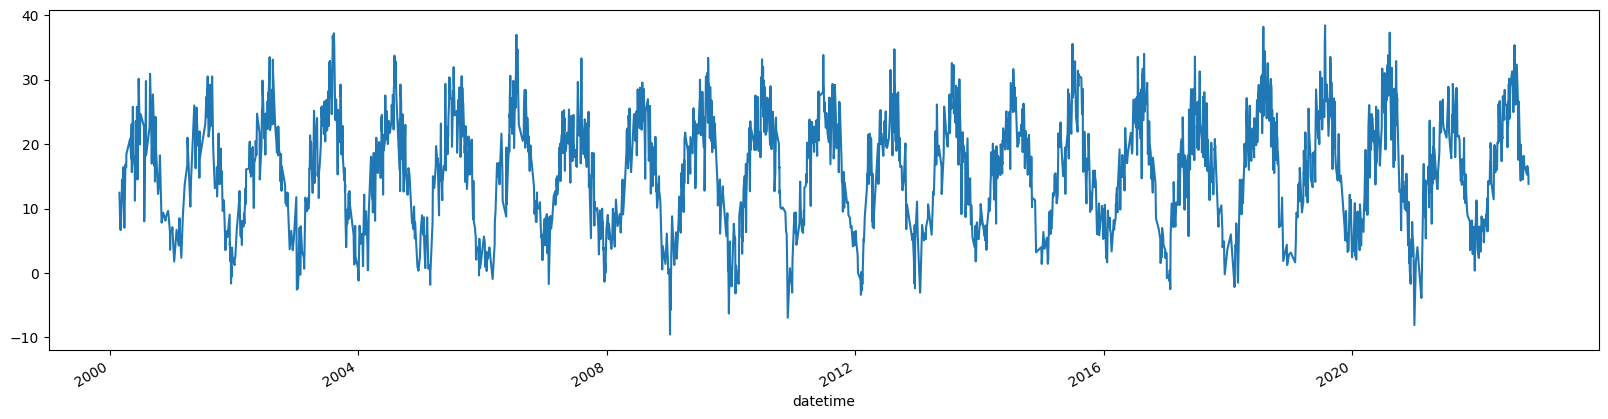

In [38]:
lst_df_point.set_index('datetime', inplace=True)
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5)) 
lst_df_point['LST_Day_1km'].plot()
plt.show()

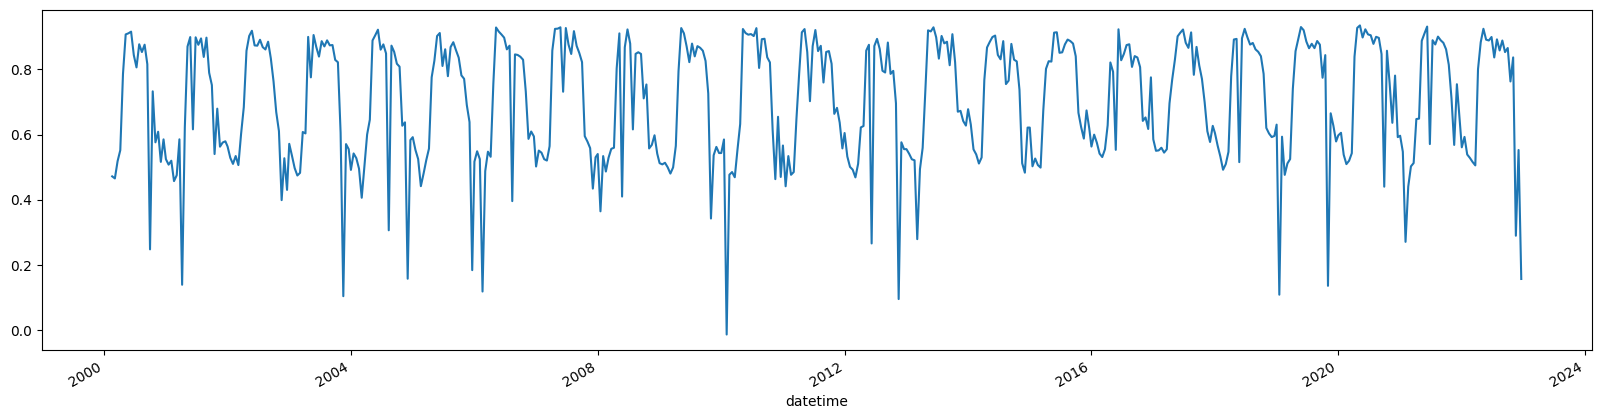

In [39]:
ndvi_df_point.set_index('datetime', inplace=True)
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5)) 
ndvi_df_point['NDVI'].plot()
plt.show()